# Python Homework 4

**Release date:** Monday, July 18 <br>
**Due date:** Friday, July 29, at midnight via <font color=blue>Gradescope</font>

**Instruction:** Please upload your jupyter notebook on <font color=blue>Gradescope</font> with filename __PythonProjectII_YOURPERMNUMBER.ipynb__.

In [25]:
#  NAMES                 PERMS
# Saba Hatam-Tabrizi    9822693
# Keshav Khanna         8308843

__Background:__ Markov chains can be used to model a plethora of phenomena that happen in the world. The only assumption that one has to accept is the Markov Property.

As usual, we start with loading some packages:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

## Problem 1 (10 Points)

1.   List item
2.   List item



In Mathematical Finance, Markov chains are used to model the default risk of a company or country (more specifically, the default of a company's or country's liability like a corporate or government bond - see e.g. PSTAT 171 and PSTAT 170). 

Rating agencies (like <i>Standard & Poor’s</i>, <i>Moody’s</i>, <i>Fitch</i>) rate the financial stability of a company and classify them according to different classes. A possible classification may range from 'AAA' for debitors with a very good credit rating to 'CCC' for debitors which are very likely to delay in paying a debt; and 'D' for those debitors which can't satisfy their financial liabilities anymore (in other words, they are default). 

The yearly credit rating of a company can be modeled as a Markov chain $(X_n)_{n=0,1,2,\ldots}$ with state space

$$ \mathcal{S} = \{ AAA,\, AA,\, A,\, BBB,\, BB,\, B,\, CCC,\, D \} $$

where $X_n$ represents the credit rating class of a company in the $n$-th year. The transition probabilities are given by

\begin{equation*}
\begin{array}{ccccccccc}
 & AAA & AA & A & BBB & BB & B & CCC & D \\
 AAA & 0.9207 & 0.0709 & 0.0063 & 0.0015 & 0.0006 & 0.00 & 0.00 & 0.00 \\ 
 AA & 0.0062 & 0.9084 & 0.0776 & 0.0059 & 0.0006 & 0.0010 & 0.0002 & 0.0001 \\
 A & 0.0005 & 0.0209 & 0.9138 & 0.0579 & 0.0044 & 0.0016 & 0.0004 & 0.0005 \\
 BBB & 0.0003 & 0.0021 & 0.0410 & 0.8937 & 0.0482 & 0.0086 & 0.0024 & 0.0037 \\
 BB & 0.0003 & 0.0008 & 0.0040 & 0.0554 & 0.8324 & 0.0815 & 0.0111 & 0.0145 \\
 B & 0.00 & 0.0008 & 0.0027 & 0.0034 & 0.0539 & 0.8241 & 0.0492 & 0.0659 \\
 CCC & 0.0010 & 0.00 & 0.0029 & 0.0058 & 0.0155 & 0.1054 & 0.5280 & 0.3414 \\
 D & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.0
\end{array} 
\end{equation*}

<i>Remark</i>: For your implementations below, you can label the different states from $0$ to $7$, where $0$ represents state $AAA$, $1$ represents state $AA$, and so on.

1. Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>.

In [27]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
P = np.array(
    [
              [.9207,.0709,.0063,.0015,.0006,0.00,0.00,0.00],  # AAA = 0
[.0062,.9084,.0776,.0059,.0006,.0010,.0002,.0001],  # AA = 1
[.0005,.0209,.9138,.0579,.0044,.0016,.0004,.0005],  # A = 2
[.0003,.0021,.0410,.8937,.0482,.0086,.0024,.0037],  # BBB = 3
[.0003,.0008,.0040,.0554,.8324,.0815,.0111,.0145],  # BB = 4
[0.00,.0008,.0027,.0034,.0539,.8241,.0492,.0659],   # B = 5
[.0010,0.00,.0029,.0058,.0155,.1054,.5280,.3414],  # CCC = 6
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0] #D = 7
]
)   
       
S = ['AAA','AA','A','BBB','BB','B','CCC','D'] #State space of the Markov Chain

2. Write a function called <tt>simulateRating(...)</tt> which simulates the Markov chain. 

Input:
* <tt>startRating</tt>: Initial state of the Markov chain at time 0
* <tt>numberOfSteps</tt>: Number of steps $n$
* <tt>P</tt>: Transition matrix

Output:
* <tt>samplePath</tt>: An array of length $n+1$ (!) with the values $X_0, X_1, \ldots, X_n$.

In [28]:
def simulateRating(startRating, numberOfSteps, P):
  index = 0 #index of the first item of the list is set to 0
  start = startRating #Assigning the start rating to the variable start 
  samplePath = [start] #Placing the start item at the first position of the list 
  for i in np.arange(numberOfSteps): #We will iterate this loop for total number of step 
    prob = P[samplePath[index]] #assigning probabilities corresponding to the first rating in the list i.e start Rating
    end = int(np.random.choice(8,1,p = prob)) #Based on the corresponding probabilities, we randomly select a credit rating out of 8 ratings 
    samplePath.append(end) #appending the selected item at the end of our list 
    index = index+1 #increasing index by 1 to do the above steps for each successive rating until n number of steps  
  return samplePath

In [29]:
## TEST YOUR FUNCTION HERE
simulateRating( startRating = 0, numberOfSteps = 10, P = P )

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

3. Write a code to simulate and plot <tt>numPaths = 5</tt> paths with <tt>numberOfSteps = 100</tt> with staring value <tt>startRating = 2</tt> in one plot.

In [30]:
startRating = 2
numberOfSteps = 100
numPaths = 5
paths = []

for i in range(numPaths): #this loop helps to generate form n number of paths having a certain starting rating, nuimber of steps and Probability matrix
  path = simulateRating(startRating,numberOfSteps+1,P)
  paths.append(np.array(path))

In [31]:
paths


[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 4, 4, 4, 4,
        4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 4, 4, 4, 4, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
        

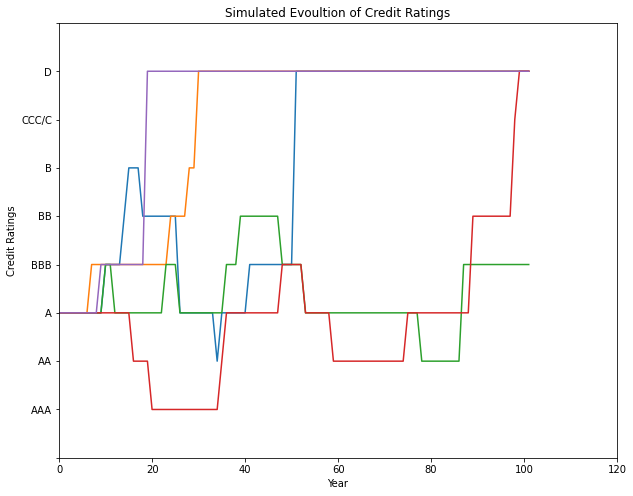

In [32]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

plt.figure(figsize=( 10, 8 )) #To set the figure size of the plot

plt.title('Simulated Evoultion of Credit Ratings') #To plot the title of the graph 
plt.ylabel('Credit Ratings') #To set y-label as credit ratings
plt.xlabel('Year') #To set x-label as the year
plt.xlim(0,120) #To specify the limit of the x-axis

for i in range(numPaths): #We plot for each path successively using this for loop
  plt.plot(paths[i])


plt.ylim( -1, 8) #To specify the y limit of the plot
ratings = ['', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D',''] #To specifiy the values appearing on the y-axis
plt.yticks(range(-1, 9), ratings) #To adjust starting and ending y-axis values 

plt.show() #To show the plot

4. Can you say something about the long run behavior of the Markov chain? Does it depend on today's starting rate at time $0$?

Justify your answer with a plot and/or computations!

In [33]:
def path_(startRating,numberOfSteps,numPaths,P):
  paths = []
  for i in range(numPaths):
    path = simulateRating(startRating,numberOfSteps+1,P)
    paths.append(np.array(path))
  return paths

In [34]:
path1 = path_(2,500,10,P)
path2 = path_(4,500,10,P)
path3 = path_(1,500,10,P)

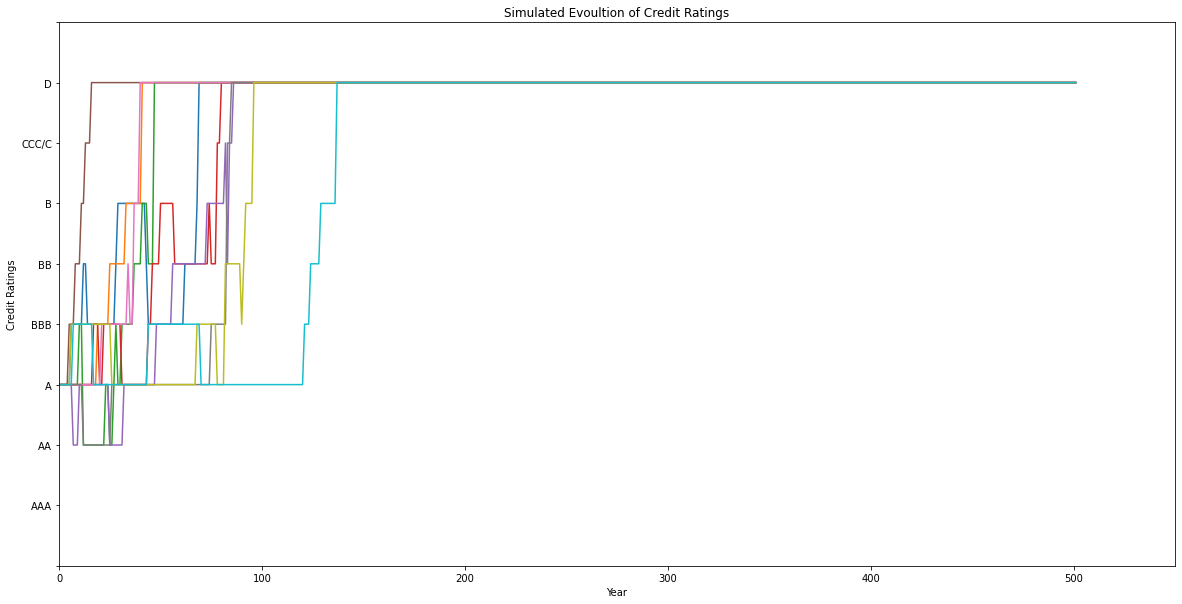

In [35]:
#Long Run Behavior Plot 1

plt.figure(figsize=( 20, 10)) #To set the figure size of the plot

numPaths = 10
plt.title('Simulated Evoultion of Credit Ratings') #To plot the title of the graph 
plt.ylabel('Credit Ratings') #To set y-label as credit ratings
plt.xlabel('Year') #To set x-label as the year
plt.xlim(0,550) #To specify the limit of the x-axis

for i in range(numPaths): #We plot for each path successively using this for loop
  plt.plot(path1[i])

plt.ylim( -1, 8) #To specify the y limit of the plot
ratings = ['', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D',''] #To specifiy the values appearing on the y-axis
plt.yticks(range( -1, 9), ratings ) #To adjust starting and ending y-axis values

plt.show() #To show the plot

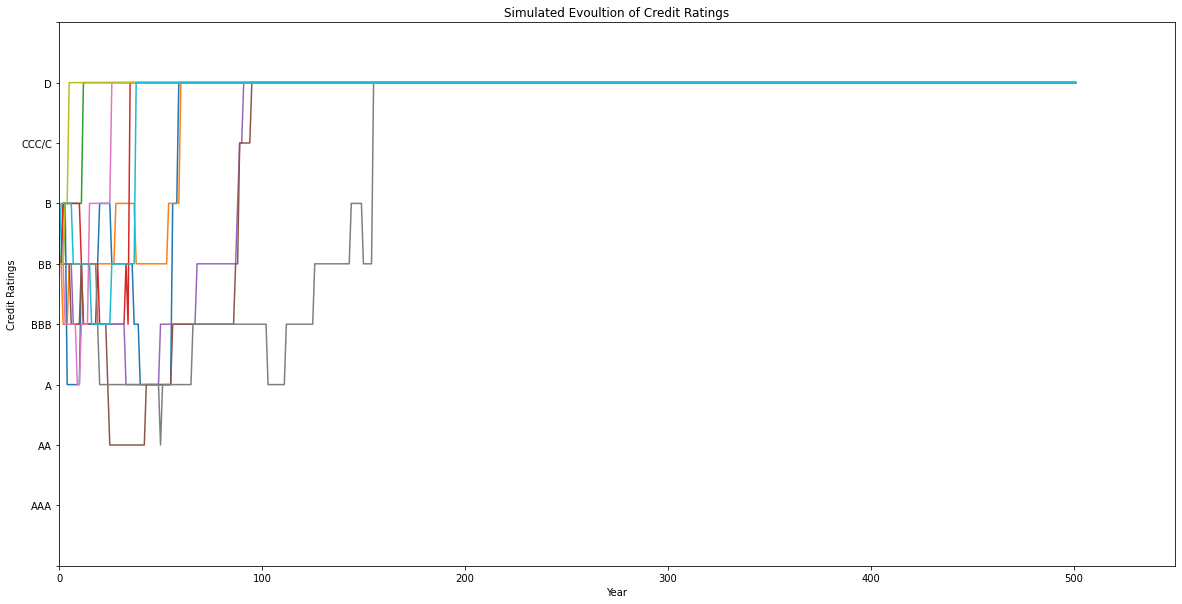

In [36]:
#Long Run Behavior Plot 2

plt.figure(figsize=( 20, 10 )) #To set the figure size of the plot 

numPaths = 10
plt.title('Simulated Evoultion of Credit Ratings') #To plot the title of the graph 
plt.ylabel('Credit Ratings') #To set y-label as credit ratings
plt.xlabel('Year') #To set x-label as the year
plt.xlim(0,550) #To specify the limit of the x-axis

for i in range(numPaths): #we plot for each path successively using this for loop
  plt.plot(path2[i])

plt.ylim( -1, 8) #To specify the y limit of the plot
ratings = ['', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D',''] #To specify the values appearing on the y-axis 
plt.yticks(range( -1, 9), ratings ) #To adjust the starting and the ending y-axis values

plt.show() #To show the plot 

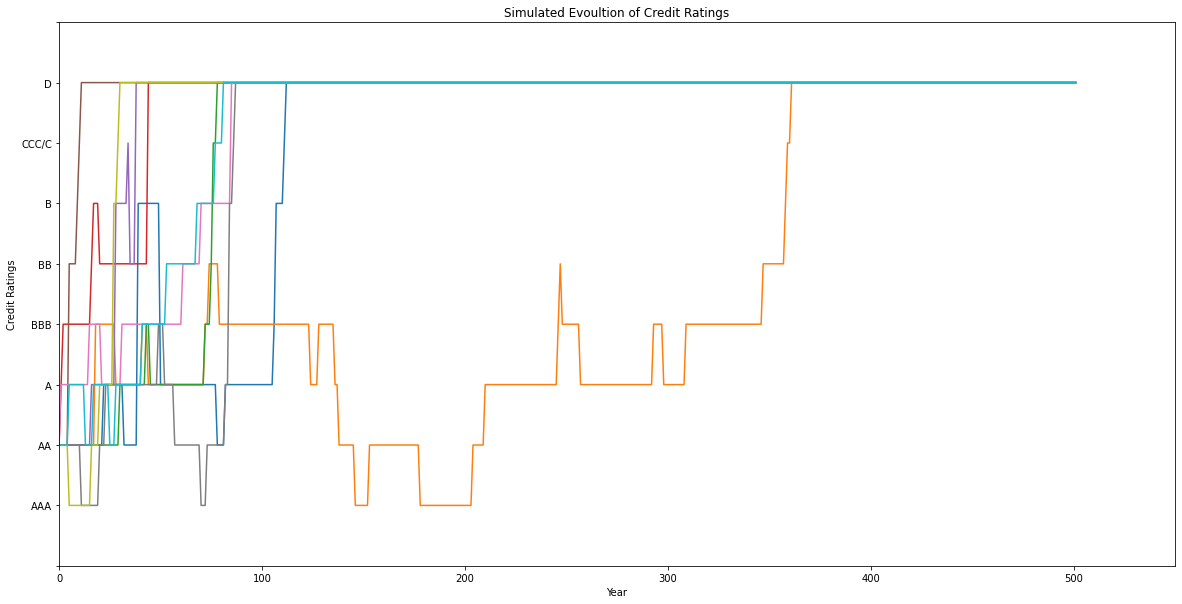

In [37]:
#Long Run Behavior Plot 3

plt.figure(figsize=( 20, 10 )) #To set the figure size of the plot 

numPaths = 10
plt.title('Simulated Evoultion of Credit Ratings') #To plot the title of the graph 
plt.ylabel('Credit Ratings') #To set y-label as credit ratings 
plt.xlabel('Year') #To set x-label as the year 
plt.xlim(0,550) #To specify the limit of the x-axis 

for i in range(numPaths): #We plot for each path successively using this for loop 
  plt.plot(path3[i])

plt.ylim( -1, 8) #To specify the y limit of the plot 
ratings = ['', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D',''] #To specify the values appearing on the y-axis
plt.yticks(range( -1, 9), ratings) #To adjust starting and ending y-axis values 

plt.show() #To show the plot 

The long run behavior of the Markov chain depicts that each successive step depends on the previous step and doesn't depend on the steps before the previous steps. Thus, its long term behavior doesn't depend on today's starting rate at time 0. As seen in the long term plots, all of them have 5 paths and each of these 5 paths for starting credit ratings 'A' (starting point = 2), 'BB' (starting point = 4), 'AA' (starting point = 1) converge to credit rating 'D' (point = 7) after 300 years. 

## Problem 2 (10 Points)

Sahin and Sen (2001) model hourly wind speeds in a northwestern part of Turkey as a Markov chain ${(X_n)}_{n=0,1,\ldots}$ with 7 states representing different wind speed levels. Since in python arrays are indexed starting from $0$, let us consider the states to be $\mathcal{S}=\{0,1,2,3,4,5,6\}$ with $0$ representing the lowest wind speed level etc. The transition matrix $P$ is given by 

\begin{gather*}
P=\begin{array}{cccccccc}
& 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
0 & 0.756 & 0.113 & 0.129 & 0.002 & 0 & 0 & 0\\
1 & 0.174 & 0.821 & 0.004 & 0.001 & 0 & 0 & 0\\
2 & 0.141 & 0.001 & 0.776 & 0.082 & 0 & 0 & 0\\
3 & 0.003 & 0 & 0.192 & 0.753 & 0.052 & 0 & 0\\
4 & 0 & 0 & 0.002 & 0.227 & 0.735 & 0.036 & 0\\
5 & 0 & 0 & 0 & 0.007 & 0.367 & 0.604 & 0.022\\
6 & 0 & 0 & 0 & 0 & 0.053 & 0.158 & 0.789\\
\end{array}
\end{gather*}

1. Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>. Compute $P^{250}$ and list at least two of its rows.

In [38]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
P = np.array(
    [
     [.756, .113, .129, .002, 0, 0, 0],
[.174, .821, .004, .001, 0, 0, 0],
[.141, .001, .776, .082, 0, 0, 0],
[.003, 0, .192, .753, .052, 0, 0],
[0, 0, .002, .227, .735, .036, 0],
[0, 0, 0, .007, .367, .604, .022],
[0, 0, 0, 0, .053, .158, .789]
]
)


power = np.linalg.matrix_power(P, 250) #To find P^(250)
print(power[:2])

[[3.24586174e-01 2.06604292e-01 3.03930586e-01 1.31889029e-01
  2.98620155e-02 2.83256580e-03 2.95338614e-04]
 [3.24586174e-01 2.06604292e-01 3.03930586e-01 1.31889029e-01
  2.98620155e-02 2.83256580e-03 2.95338614e-04]]


2. Compute the stationary distribution $\pi$ as a right-eigenvector of $P^T$ to the eigenvalue 1 (see also Lecture 15, slide 7).

In [39]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
import scipy #To import scipy package
from scipy import linalg #To import linalg package from scipy 
P_transpose = np.transpose(P) #Taking P transpose
eigenvalue, eigenvector = scipy.linalg.eig(P_transpose) #This function helps us to find eigenvalues and eigenvectors of P transpose 


print(eigenvalue)
print(eigenvector)

#We know from the lecture that stationary distribution 𝜋 is a right eigenvector as P_transpose with
# eigenvalue = 1

eigenvector_w_eigenval_1 = [] #creating an empty list of eigenvector with eigenvalues 1 
for i in range(7):
  eigenvector_w_eigenval_1.append(eigenvector[i][0]) #select on values for eigenvector with eigenvalues 1

eigenvector_w_eigenval_1 = np.asarray(eigenvector_w_eigenval_1)

#Turning eigenvector elements into probabilities
stationary_distribution = eigenvector_w_eigenval_1/sum(eigenvector_w_eigenval_1) #finding the stationary distribtuion
print(stationary_distribution) 


[1.        +0.j 0.50698487+0.j 0.56087609+0.j 0.66630178+0.j
 0.90132232+0.j 0.7776084 +0.j 0.82090653+0.j]
[[ 6.38151075e-01  4.30135575e-01  7.03820115e-01 -6.53682755e-01
   4.49128453e-01 -2.11290442e-01  6.04894487e-03]
 [ 4.06193367e-01 -1.52932239e-01 -3.03423321e-01  4.78689788e-01
   6.28096249e-01  5.67176547e-01  6.05308624e-01]
 [ 5.97541256e-01 -5.82283200e-01 -6.04013568e-01 -1.86304840e-01
  -3.01367917e-01 -7.34877073e-01 -7.40108812e-01]
 [ 2.59299786e-01  5.33958450e-01  2.09813528e-01  5.37045341e-01
  -5.09160946e-01  1.21099808e-01 -1.91914022e-01]
 [ 5.87100708e-02 -3.76396336e-01  3.72296512e-02 -1.32540408e-01
  -2.29589941e-01  2.77310254e-01  2.05112521e-01]
 [ 5.56895227e-03  1.59999295e-01 -4.80613893e-02 -5.26467850e-02
  -3.10285022e-02  2.08527661e-02  6.83940722e-02]
 [ 5.80649052e-04 -1.24815449e-02  4.63498360e-03  9.43965862e-03
  -6.07739455e-03 -4.02718592e-02  4.71586718e-02]]
[3.24586174e-01 2.06604292e-01 3.03930586e-01 1.31889029e-01
 2.98620155

3. In Lecture 17 we will provide following Theorem:

<b>Theorem:</b> For any finite irreducible Markov the stationary distribution $\pi$ satisfies

\begin{equation*}
\pi_j=\frac{1}{\mathbb{E}[T_j\,| \,X_0=j]} \quad \text{ for all } j \in \mathcal{S} 
\end{equation*}

where $T_j = \min\{n>0:X_n=j \}$ denotes the first visiting time/hitting time of state $j$ after having started in state $j$ at time 0.

In other words, in order to find the expected return time to state $j$ we just have to compute $1/\pi_j$.

Check numerically that this Theorem holds true for state $0$. That is, simulate $N=10^5$ realizations of the Markov Chain with transition matrix $P$ that start in state $0$. Each Markov chain should be simulated until state $0$ is reached again (so you do not actually have to run each Markov chain for many steps). For each of the $N$ simulations, memorize how many steps it took to get back to state $0$. A good estimate of $\mathbb{E}[T_0 \,| \, X_0=0]$ will then be the average of all of those times. Because of the above Theorem, the estimate should be close to $1/\pi_0$.

In [40]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
import math
def sim1(start0, P):
  start = start0  # store start0 because it's changing in the function 
  x = 0
  t = 0
  while x == 0:
    t += 1  # increase trials linearly 
    end = np.random.choice(7,1,p = P[start])  # genarate random sample from starting value of P
    if end == start0: 
      x = 1
    start = int(end)  # integer value for start 
  return t  # our final number of trials which will be implemented in our next function that performs this 1 million times 

def million_sim(P):
    pi = np.zeros(10**5)  # list of a million zeros 
    for i in np.arange(10**5):  # perform million simulations 
        pi[i] = sim1(0,P) # perform sim1 on each iteration 
    average_pi = 1/np.mean(pi)  # average of all of those times
    print("%s (Real 1/pi is %s)" %(average_pi, 1/(math.pi))) # show how our value is approximately 1/pi 

million_sim(P)

0.3235083837197641 (Real 1/pi is 0.3183098861837907)
